<a href="https://colab.research.google.com/github/felipe24I/Entregas/blob/main/Base_datos_canciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Base de datos canciones**

#Cargar las librerias

In [1]:
%config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import xlrd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

##Cargar la base de datos

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
X = pd.read_excel("/content/drive/MyDrive/Lista canciones.xlsx")
X

link                        band  \
0   https://www.youtube.com/watch?v=2C5K888fsaw              Eladio Carrion   
1   https://www.youtube.com/watch?v=MaaEVFNDQLo                      Trueno   
2   https://www.youtube.com/watch?v=mzB1VGEGcSU                  Juice WRLD   
3   https://www.youtube.com/watch?v=UYwF-jdcVjY                 Post malone   
4   https://www.youtube.com/watch?v=pgN-vvVVxMA                XXXtentacion   
5   https://www.youtube.com/watch?v=xpVfcZ0ZcFM                       Drake   
6   https://www.youtube.com/watch?v=93_SgOMC9SU                 Jhay Cortez   
7   https://www.youtube.com/watch?v=FRthkpJ_NFo                        Duki   
8   https://www.youtube.com/watch?v=yexgTxDGLKs                    Arcangel   
9   https://www.youtube.com/watch?v=iFImB0TOKP4                 Myke towers   
10  https://www.youtube.com/watch?v=0MN3rfL79EU           DVBBS & Joey Dale   
11  https://www.youtube.com/watch?v=pYS-rbq4t1o                         W&W   
12  https://www.youtube.com/watch?v=XCjAfKY65Ks  Headhunterz & Crystal lake   
13  https://www.youtube.com/watch?v=HzCazh3raN0     Tiesto & Oliver Heldens   
14  https://www.youtube.com/watch?v=_ovdm2yX4MA                      Avicii   
15  https://www.youtube.com/watch?v=tKi9Z-f6qX4                    Deadmau5   
16  https://www.youtube.com/watch?v=zSguPHYRi9M                       R3hab   
17  https://www.youtube.com/watch?v=7AxI4rxCf2E                     Tiesto    
18  https://www.youtube.com/watch?v=Zv1QV6lrc_Y               Martin garrix   
19  https://www.youtube.com/watch?v=vAEwLvxHVVk                Robin Schulz   

           type  type_num  
0          Trap         1  
1          Trap         1  
2          Trap         1  
3          Trap         1  
4          Trap         1  
5          Trap         1  
6          Trap         1  
7          Trap         1  
8          Trap         1  
9          Trap         1  
10  Electronica         2  
11  Electronica         2  
12  Electronica         2  
13  Electronica         2  
14  Electronica         2  
15  Electronica         2  
16  Electronica         2  
17  Electronica         2  
18  Electronica         2  
19  Electrónica         2

In [4]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 24.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 8.7 MB/s eta 0:00:00
     ━━━━━━

In [5]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

video 1 de 20
link: https://www.youtube.com/watch?v=2C5K888fsaw

band: Eladio Carrion

type: Trap

[youtube] Extracting URL: https://www.youtube.com/watch?v=2C5K888fsaw
[youtube] 2C5K888fsaw: Downloading webpage
[youtube] 2C5K888fsaw: Downloading ios player API JSON
[youtube] 2C5K888fsaw: Downloading android player API JSON
[youtube] 2C5K888fsaw: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=2C5K888fsaw
[youtube] 2C5K888fsaw: Downloading webpage
[youtube] 2C5K888fsaw: Downloading ios player API JSON
[youtube] 2C5K888fsaw: Downloading android player API JSON
[youtube] 2C5K888fsaw: Downloading m3u8 information
[info] 2C5K888fsaw: Downloading 1 format(s): 251
[download] Destination: results/Eladio Carrion_0_1.mp3
[download] 100% of    2.82MiB in 00:00:00 at 8.19MiB/s   
Download complete... results/Eladio Carrion_0_1.mp3
video 2 de 20
link: https://www.youtube.com/watch?v=MaaEVFNDQLo

band: Trueno

type: Trap

[youtube] Extracting URL: https://www.

In [6]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Avicii_14_2.wav',
 'W&W_11_2.wav',
 'Trueno_1_1.wav',
 'Tiesto _17_2.wav',
 'Juice WRLD_2_1.wav',
 'DVBBS & Joey Dale_10_2.wav',
 'Myke towers_9_1.wav',
 'Arcangel_8_1.wav',
 'Drake_5_1.wav',
 'Eladio Carrion_0_1.wav',
 'Jhay Cortez_6_1.wav',
 'Post malone_3_1.wav',
 'Duki_7_1.wav',
 'Headhunterz & Crystal lake_12_2.wav',
 'XXXtentacion_4_1.wav',
 'Tiesto & Oliver Heldens_13_2.wav',
 'Robin Schulz_19_2.wav',
 'Deadmau5_15_2.wav',
 'Martin garrix_18_2.wav',
 'R3hab_16_2.wav']

In [7]:
!pip install soundfile #instalar sondfile

In [8]:
import soundfile as sf # para instalar pip install soundfile
#leer archivos y crear np.array audios
fs = 48000
tl = np.array([40,50,60,70,80,90,100]) #puntos lectura
ts = 5 #t segmento
Ns = len(wav_files)*len(tl) #cantidad segmentos
x_t = np.zeros((Ns,int(ts*fs),2)) #Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns,1)) #vector tipo de genero
name_c = []
#leer archivos wav
i = 0
for name in wav_files:#lectura audio .wav
    x, fs = sf.read(path+name)
    for ti in tl: #segmentos de tiempo
        x_t[i] = x[int(fs*ti):int(fs*(ti+ts)),:]
        label[i] = int(name[-5]) #tipo de genero
        name_c += [name[:-6]]
        print(f"{i} lectura: {name}; segundo {ti}:{ti+ts}; tipo música {label[i]}")
        i+=1
x_t.shape

0 lectura: Avicii_14_2.wav; segundo 40:45; tipo música [2.]
1 lectura: Avicii_14_2.wav; segundo 50:55; tipo música [2.]
2 lectura: Avicii_14_2.wav; segundo 60:65; tipo música [2.]
3 lectura: Avicii_14_2.wav; segundo 70:75; tipo música [2.]
4 lectura: Avicii_14_2.wav; segundo 80:85; tipo música [2.]
5 lectura: Avicii_14_2.wav; segundo 90:95; tipo música [2.]
6 lectura: Avicii_14_2.wav; segundo 100:105; tipo música [2.]
7 lectura: W&W_11_2.wav; segundo 40:45; tipo música [2.]
8 lectura: W&W_11_2.wav; segundo 50:55; tipo música [2.]
9 lectura: W&W_11_2.wav; segundo 60:65; tipo música [2.]
10 lectura: W&W_11_2.wav; segundo 70:75; tipo música [2.]
11 lectura: W&W_11_2.wav; segundo 80:85; tipo música [2.]
12 lectura: W&W_11_2.wav; segundo 90:95; tipo música [2.]
13 lectura: W&W_11_2.wav; segundo 100:105; tipo música [2.]
14 lectura: Trueno_1_1.wav; segundo 40:45; tipo música [1.]
15 lectura: Trueno_1_1.wav; segundo 50:55; tipo música [1.]
16 lectura: Trueno_1_1.wav; segundo 60:65; tipo músic

(140, 240000, 2)

In [16]:
from IPython.display import Audio #reproducir segmento
i = 10
Audio(x_t[i].T,rate=fs)

In [9]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(140, 120001)

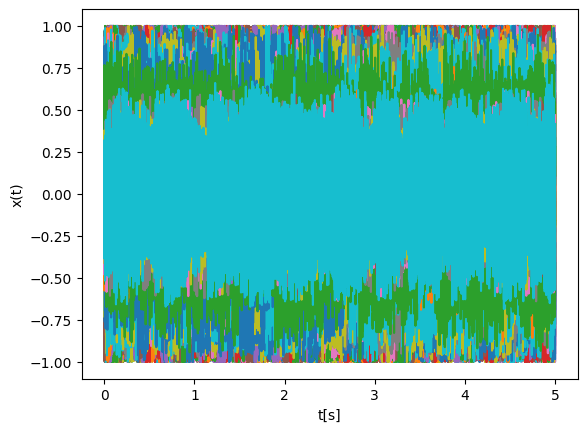

In [10]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

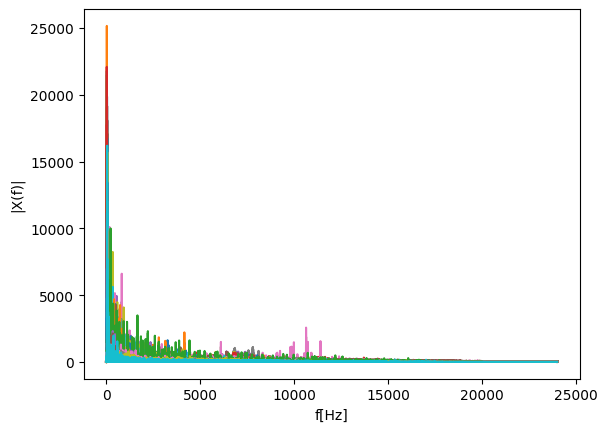

In [11]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

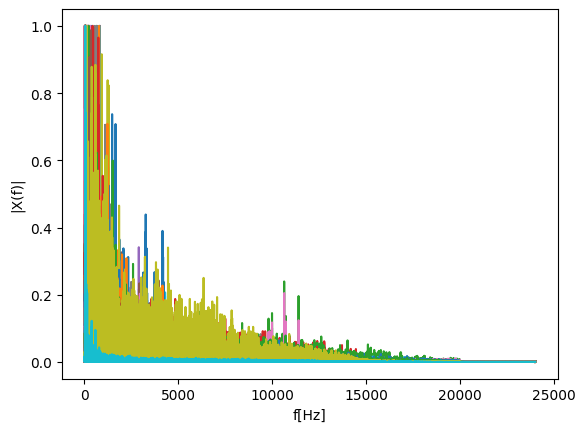

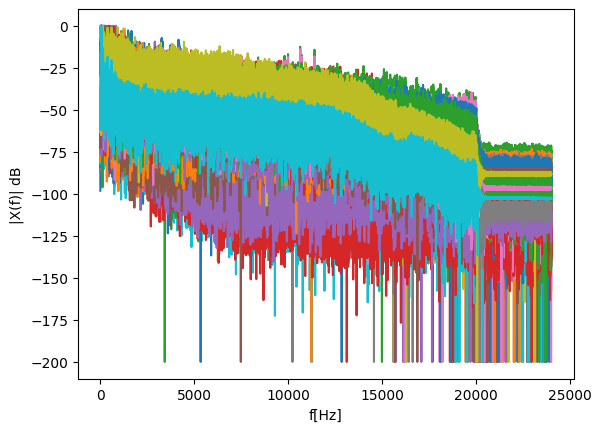

In [12]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [13]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

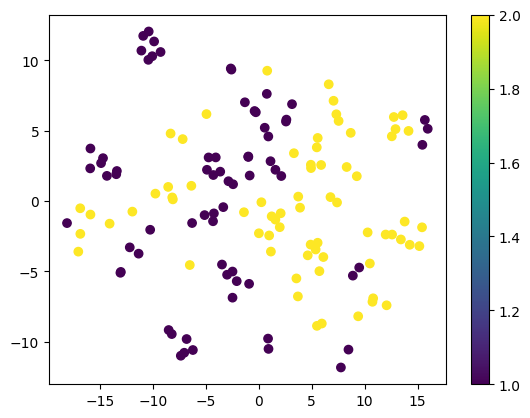

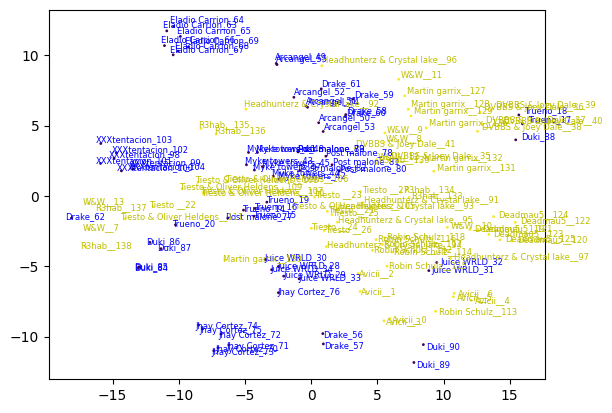

In [14]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

In [17]:
#reproducir audio
i = 96
Audio(x_t[i].T,rate=fs)

In [18]:
i = 14
Audio(x_t[i].T,rate=fs)

In [19]:
import joblib
import os

# Verificar si el directorio 'modelo' ya existe
if not os.path.exists('modelo'):
    # Si no existe, crear el directorio
    os.mkdir('modelo')

# Definir las variables que deseas guardar en el modelo
filename_ = 'modelo/reggaeton_vs_electronica'
model_ = {'Xw_': Xw_, 'fmax': fmax, 'label': label, 'name_c': name_c, 'vf': vf, 'fs': fs}

# Guardar el modelo usando joblib.dump
joblib.dump(model_, filename_ + ".pkl")

['modelo/reggaeton_vs_electronica.pkl']

In [20]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()

dict_keys(['Xw_', 'fmax', 'label', 'name_c', 'vf', 'fs'])